## Intoduction

- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

- <a>http://www.amstat.org/publications/jse/v19n3/decock.pdf</a>  
- Criteria: log of rmse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# show all df columns
pd.set_option('display.max_columns', None)
%matplotlib inline

# Helps to reload .py functions when edited
%load_ext autoreload
%autoreload 2

Refer to [HousePricePrediction-DataPreprocessing.ipynb](./HousePricePrediction-DataPreprocessing.ipynb) for pre-processing.

In [4]:
# Restore already processed file
df_train = pd.read_pickle("data/house-train.pkl")
df_test = pd.read_pickle("data/house-test.pkl")
df_target = pd.read_pickle("data/house-train-target.pkl")

In [5]:
df_train.head(10).T

Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0
MSZoning,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,0.0,51.0,50.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0
Street,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Alley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LotShape,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0
LandContour,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Utilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotConfig,4.0,2.0,4.0,0.0,2.0,4.0,4.0,0.0,4.0,0.0


In [6]:
df_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1461          20         2         80.0    11622       2      1         3   
1462          20         3         81.0    14267       2      1         0   
1463          60         3         74.0    13830       2      1         0   
1464          60         3         78.0     9978       2      1         0   
1465         120         3         43.0     5005       2      1         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
1461            3          0          4          0            12           1   
1462            3          0          0          0            12           2   
1463            3          0          4          0             8           2   
1464            3          0          4          0             8           2   
1465            1          0          4          0            22           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1461           2         0           2            5            6       1961   
1462           2         0           2            6            6       1958   
1463           2         0           5            5            5       1997   
1464           2         0           5            6            6       1998   
1465           2         4           2            8            5       1992   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
Id                                                                              
1461          1961          1         0           13           13           2   
1462          1958          3         0           14           14           1   
1463          1998          1         0           13           13           2   
1464          1998          1         0           13           13           1   
1465          1992          1         0            6            6           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
Id                                                                       
1461         0.0          3          4           1         4         4   
1462       108.0          3          4           1         4         4   
1463         0.0          3          4           2         2         4   
1464        20.0          3          4           2         4         4   
1465         0.0          2          4           2         2         4   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                       
1461             3             3       468.0             2       144.0   
1462             3             5       923.0             1         0.0   
1463             3             6       791.0             1         0.0   
1464             3             6       602.0             1         0.0   
1465             3             5       263.0             1         0.0   

      BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
Id                                                                         
1461      270.0        882.0        1          4           1           4   
1462      406.0       1329.0        1          4           1           4   
1463      137.0        928.0        1          2           1           4   
1464      324.0        926.0        1          0           1           4   
1465     1017.0       1280.0        1          0           1           4   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896 

In [7]:
#Define criteria
import math
from sklearn.metrics import r2_score

def rmse(y, y_pred): return math.sqrt(((y-y_pred)**2).mean())


def print_score(m):
    y_bar = m.predict(X)
    res = [rmse(y_bar, y), r2_score(y_bar.reshape(-1,1), y.values.reshape(-1,1))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [8]:
# This is the log of sales price. Has to be converted back after prediction.
df_target.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePrice, dtype: float64

In [9]:
print("Training Set Shape:", df_train.shape)
print("Test Set Shape:", df_test.shape)

Training Set Shape: (1458, 1637)
Test Set Shape: (1459, 1637)


## Using Sklearn GBM

Following the [Analytics Vidya Tutorial on Parameter Tuning](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

In [188]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import cross_val_score, GridSearchCV #Perforing grid search
from sklearn import metrics   #metrics

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10 

In [190]:
# Model creation function
def modelfit(alg, X_train=X, y_train=y, X_test=None, predictors=None, performCV=True, \
             printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    Xtrain_predictions = alg.predict(X_train)
    
        #Print model report:
    print("\nModel Report")
    print("R2 Score : %.4g" % metrics.r2_score(y_train.values, Xtrain_predictions))
    rmse = 2*np.sqrt(metrics.mean_squared_error(y_train, Xtrain_predictions))
    print("RMSE Score (Train): %f" % rmse)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, \
                                   scoring='neg_mean_squared_error', n_jobs=-1)
        print("CV Score : Mean = %.7g | Std = %.7g | Min = %.7g | Max = %.7g" \
              % (
                    np.mean(np.sqrt(-1*cv_score)),\
                    np.std(np.sqrt(-1*cv_score)), \
                    np.min(np.sqrt(-1*cv_score)),\
                    np.max(np.sqrt(-1*cv_score)) 
                )
             )
       
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.iloc[0:20].plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

### Base Model

In [169]:
X = df_train.copy()
y = df_target
X_test = df_test.copy()

predictors = df_train.columns


Model Report
R2 Score : 0.9699
RMSE Score (Train): 0.138648
CV Score : Mean = 0.1249593 | Std = 0.00370151 | Min = 0.1208222 | Max = 0.1303726


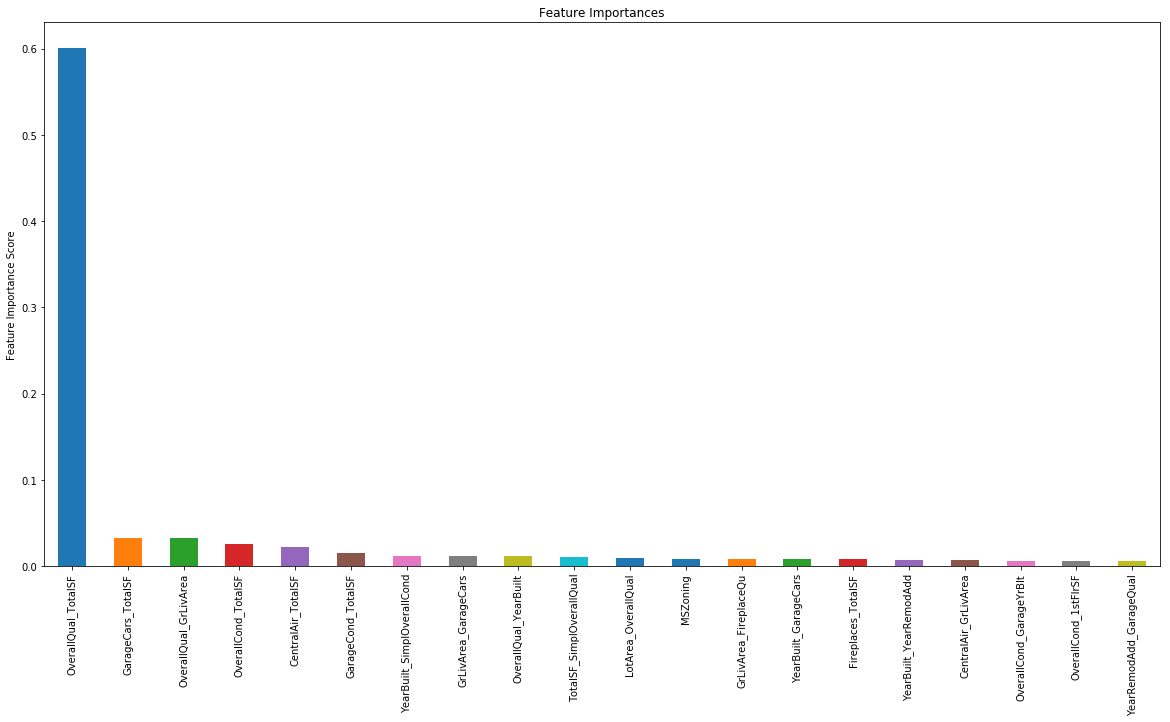

In [82]:
gbm0 = GradientBoostingRegressor(random_state=10)
modelfit(gbm0, X, y, predictors=predictors, printFeatureImportance=True)

- So the base RMSE score is 0.1249593 and we expect our model to do better. 
- One feature seems too important than others. We intend to fix this in the model

### Parameter Tuning

#### Looking for best Learning Rate

In [122]:
param_test1 = {'n_estimators':range(50,200,10)}
grid_search = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.2, min_samples_split=15,min_samples_leaf=50,max_depth=8,max_features="sqrt",subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='neg_mean_squared_error', n_jobs=4,iid=False, cv=5)

In [143]:
def grid_details(grid_search):
    grid_search.fit(X,y)
    print(f'Best Params: {np.sqrt(-1*grid_search.best_score_)}, {grid_search.best_params_}\n'
          )
    cvres = grid_search.cv_results_
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)

In [144]:
grid_details(grid_search)

Best Params: 0.12911472373877006, {'n_estimators': 80}

0.12955680725522142 {'n_estimators': 50}
0.12925273499266957 {'n_estimators': 60}
0.12913202135900284 {'n_estimators': 70}
0.12911472373877006 {'n_estimators': 80}
0.12943239475262935 {'n_estimators': 90}
0.1297314945024902 {'n_estimators': 100}
0.12980850888757436 {'n_estimators': 110}
0.13020208667477384 {'n_estimators': 120}
0.1305848091226282 {'n_estimators': 130}
0.13079524896379172 {'n_estimators': 140}
0.13100795723456118 {'n_estimators': 150}
0.1312595510961745 {'n_estimators': 160}
0.131176222989626 {'n_estimators': 170}
0.1313028204415869 {'n_estimators': 180}
0.13161311413375962 {'n_estimators': 190}


Note the proportion of LR and n_estimators  
- At LR = 0.1, ({'n_estimators': 160}, 0.1254292644241446)  
- At LR = 0.2, ({'n_estimators': 80}, 0.12911472373877006)

#### Tuning Tree Specific Parameters

In [125]:
#Tuning max_depth and min_samples_split
param_test2 = {'max_depth':range(2,16,2), 'min_samples_split':range(40,500,20)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.2, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=4,iid=False, cv=5)

In [126]:
grid_details(gsearch2)

Best Params: 0.1256041891238562, {'max_depth': 4, 'min_samples_split': 320}

0.12956076304315248 {'max_depth': 2, 'min_samples_split': 40}
0.1307603361990565 {'max_depth': 2, 'min_samples_split': 60}
0.13058670861066993 {'max_depth': 2, 'min_samples_split': 80}
0.1303820994372515 {'max_depth': 2, 'min_samples_split': 100}
0.1298263248714928 {'max_depth': 2, 'min_samples_split': 120}
0.12926560801507184 {'max_depth': 2, 'min_samples_split': 140}
0.1303380017354368 {'max_depth': 2, 'min_samples_split': 160}
0.1300190887560315 {'max_depth': 2, 'min_samples_split': 180}
0.13008324937413032 {'max_depth': 2, 'min_samples_split': 200}
0.12942648853805483 {'max_depth': 2, 'min_samples_split': 220}
0.1295446673362033 {'max_depth': 2, 'min_samples_split': 240}
0.12990353341194844 {'max_depth': 2, 'min_samples_split': 260}
0.1300195279671387 {'max_depth': 2, 'min_samples_split': 280}
0.12988361065247003 {'max_depth': 2, 'min_samples_split': 300}
0.13038445006103322 {'max_depth': 2, 'min_samples_s

In [151]:
#Tuning min_samples_leaf
param_test3 = {'min_samples_leaf':range(2,50,2)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=160,\
                                                              max_depth=4,max_features='sqrt',\
                                                              min_samples_split=320, \
                                                              subsample=0.8, \
                                                              random_state=10), 
param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)

In [152]:
grid_details(gsearch3)

Best Params: 0.12377067045226997, {'min_samples_leaf': 4}

0.12380347021998532 {'min_samples_leaf': 2}
0.12377067045226997 {'min_samples_leaf': 4}
0.12393194722304501 {'min_samples_leaf': 6}
0.1242961307042093 {'min_samples_leaf': 8}
0.1244822411207939 {'min_samples_leaf': 10}
0.1249586170823763 {'min_samples_leaf': 12}
0.1250034404020028 {'min_samples_leaf': 14}
0.12467530161252574 {'min_samples_leaf': 16}
0.12504079520846684 {'min_samples_leaf': 18}
0.12403760046644038 {'min_samples_leaf': 20}
0.12496632320234759 {'min_samples_leaf': 22}
0.12490077222709604 {'min_samples_leaf': 24}
0.12476203488646996 {'min_samples_leaf': 26}
0.12493849645536527 {'min_samples_leaf': 28}
0.1253106114708997 {'min_samples_leaf': 30}
0.12496281634598934 {'min_samples_leaf': 32}
0.12483826922434656 {'min_samples_leaf': 34}
0.1253825317634186 {'min_samples_leaf': 36}
0.12526956673249146 {'min_samples_leaf': 38}
0.12514297819083742 {'min_samples_leaf': 40}
0.12592335341035935 {'min_samples_leaf': 42}
0.1261


Model Report
R2 Score : 0.9592
RMSE Score (Train): 0.161418
CV Score : Mean = 0.1236918 | Std = 0.004418478 | Min = 0.1187973 | Max = 0.1292459


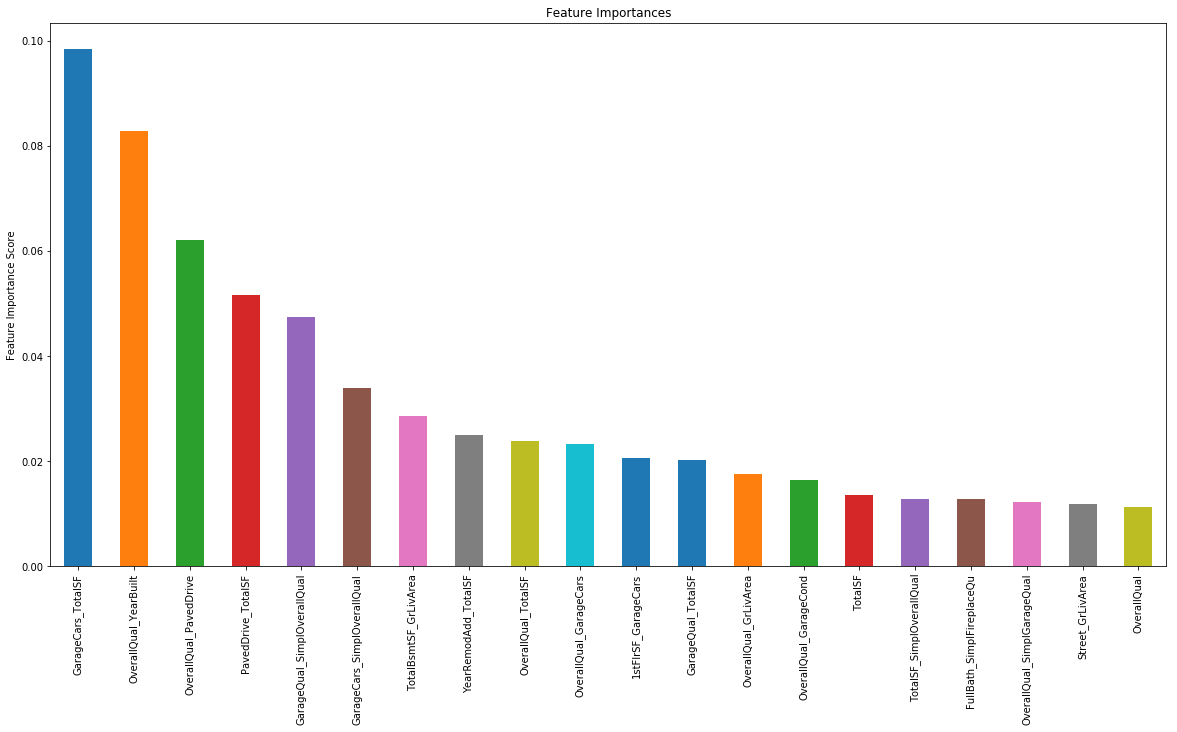

In [153]:
modelfit(gsearch3.best_estimator_, predictors=predictors)

The above gives a better generalization. More features are having importance

In [154]:
#Tuning max features
param_test4 = {'max_features':range(20,500,20)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.2, n_estimators=80,\
                                                              max_depth=4,\
                                                              min_samples_split=320, \
                                                              min_samples_leaf=4, \
                                                              subsample=0.8, \
                                                              random_state=10),
param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)

In [155]:
grid_details(gsearch4)

Best Params: 0.12266594226962907, {'max_features': 220}

0.12824920753699268 {'max_features': 20}
0.12605298206670779 {'max_features': 40}
0.12947480073762796 {'max_features': 60}
0.12647611565586284 {'max_features': 80}
0.12504628221069497 {'max_features': 100}
0.126320466091296 {'max_features': 120}
0.12668872065882433 {'max_features': 140}
0.12693442905209815 {'max_features': 160}
0.1279815571549862 {'max_features': 180}
0.1253709887931881 {'max_features': 200}
0.12266594226962907 {'max_features': 220}
0.1246435631072145 {'max_features': 240}
0.12737851648066428 {'max_features': 260}
0.12531930805974412 {'max_features': 280}
0.12561065923308357 {'max_features': 300}
0.12586251778399857 {'max_features': 320}
0.12580760063446644 {'max_features': 340}
0.1262429050113641 {'max_features': 360}
0.12539288452121455 {'max_features': 380}
0.12575384430609027 {'max_features': 400}
0.12542710523640552 {'max_features': 420}
0.12517118561539814 {'max_features': 440}
0.12653579115465008 {'max_fea


Model Report
R2 Score : 0.9635
RMSE Score (Train): 0.152626
CV Score : Mean = 0.1224771 | Std = 0.006804372 | Min = 0.112628 | Max = 0.1318739


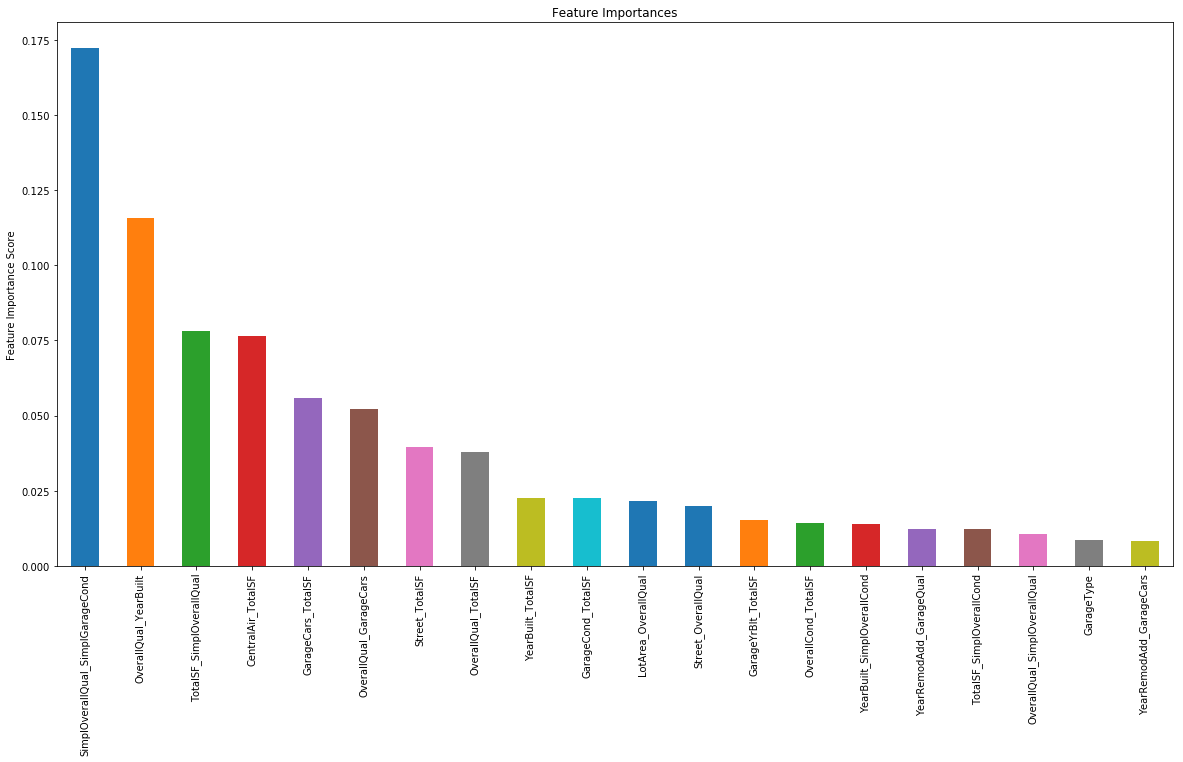

In [156]:
modelfit(gsearch4.best_estimator_, predictors=predictors)

Current Tuning Summary  
- n_estimators=80,  
- max_depth=4,  
- min_samples_split=320,  
- min_samples_leaf=4,

In [157]:
# Tuning subsample
param_test5 = {'subsample':[0.4, 0.5, 0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.2, n_estimators=80,\
                                                              max_depth=4,\
                                                              min_samples_split=320, \
                                                              min_samples_leaf=4, \
                                                              max_features=220, \
                                                              #subsample=0.8, \                                                         
                                                              random_state=10),
param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5)

In [158]:
grid_details(gsearch5)

Best Params: 0.12266594226962907, {'subsample': 0.8}

0.13320390344570443 {'subsample': 0.4}
0.12756501921005464 {'subsample': 0.5}
0.13018712473799343 {'subsample': 0.6}
0.1268414602386466 {'subsample': 0.7}
0.12736235511710592 {'subsample': 0.75}
0.12266594226962907 {'subsample': 0.8}
0.1261908981990054 {'subsample': 0.85}
0.12648320968902074 {'subsample': 0.9}


subsample = 0.8 works most of the time as shown


Model Report
R2 Score : 0.9644
RMSE Score (Train): 0.150716
CV Score : Mean = 0.1200211 | Std = 0.004639172 | Min = 0.1140859 | Max = 0.1261085


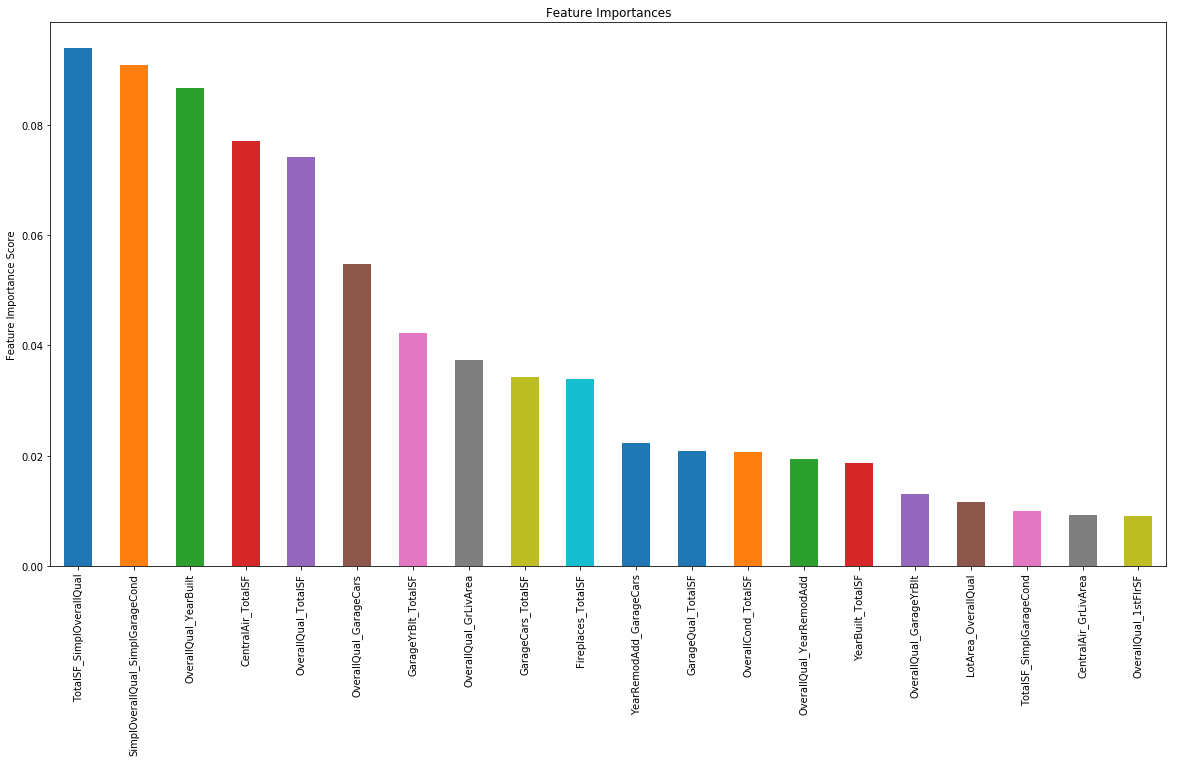

In [164]:
# Tuning the learning rate. LR requires proportional increase in trees and LR decreases
# LR reduced to 0.1 and n_estimators increased to 160
gbm_tuned_1 = GradientBoostingRegressor(learning_rate=0.1,
                                        n_estimators=160,
                                        max_depth=4,
                                        min_samples_split=320,
                                        min_samples_leaf=4,
                                        max_features=220,
                                        subsample=0.8,
                                        random_state=10)
modelfit(gbm_tuned_1, predictors=predictors)


Model Report
R2 Score : 0.9658
RMSE Score (Train): 0.147862
CV Score : Mean = 0.1188172 | Std = 0.005395378 | Min = 0.1104476 | Max = 0.1255028


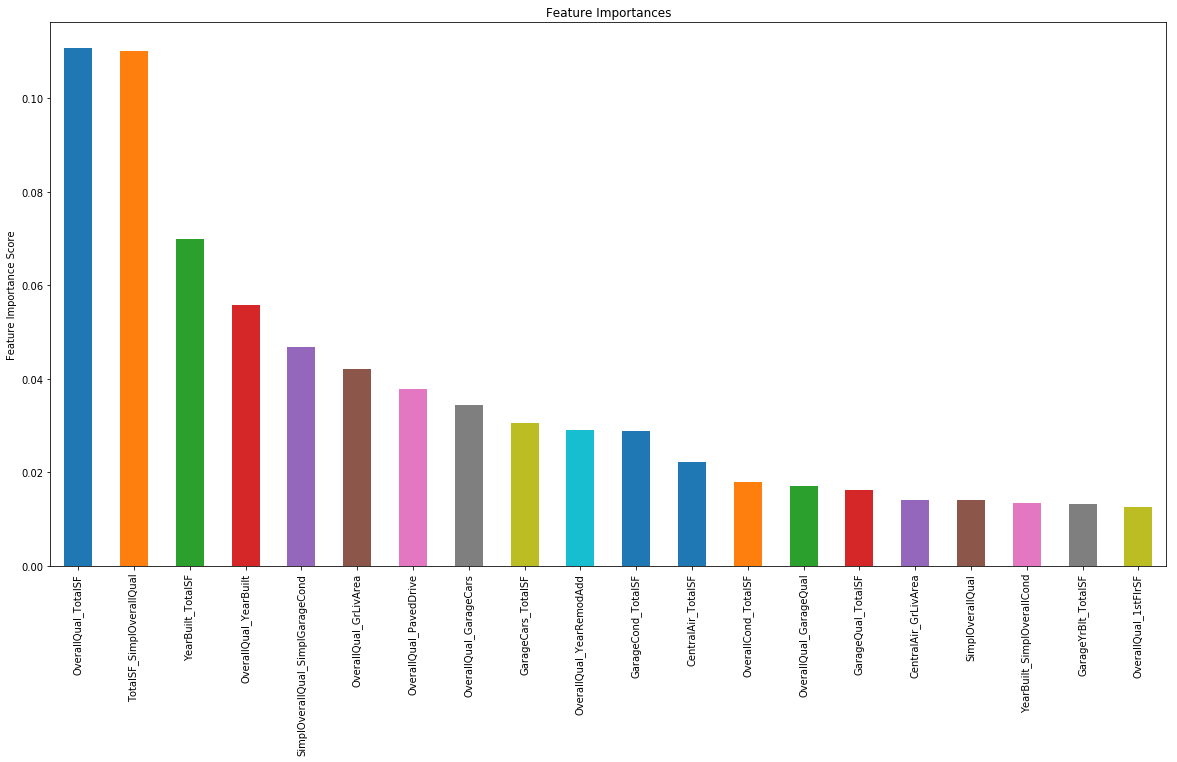

In [165]:
# LR reduced to 0.05 and n_estimators increased to 320
gbm_tuned_2 = GradientBoostingRegressor(learning_rate=0.05,
                                        n_estimators=320,
                                        max_depth=4,
                                        min_samples_split=320,
                                        min_samples_leaf=4,
                                        max_features=220,
                                        subsample=0.8,
                                        random_state=10)
modelfit(gbm_tuned_2, predictors=predictors)


Model Report
R2 Score : 0.9663
RMSE Score (Train): 0.146726
CV Score : Mean = 0.1185129 | Std = 0.004951222 | Min = 0.1111688 | Max = 0.1252883


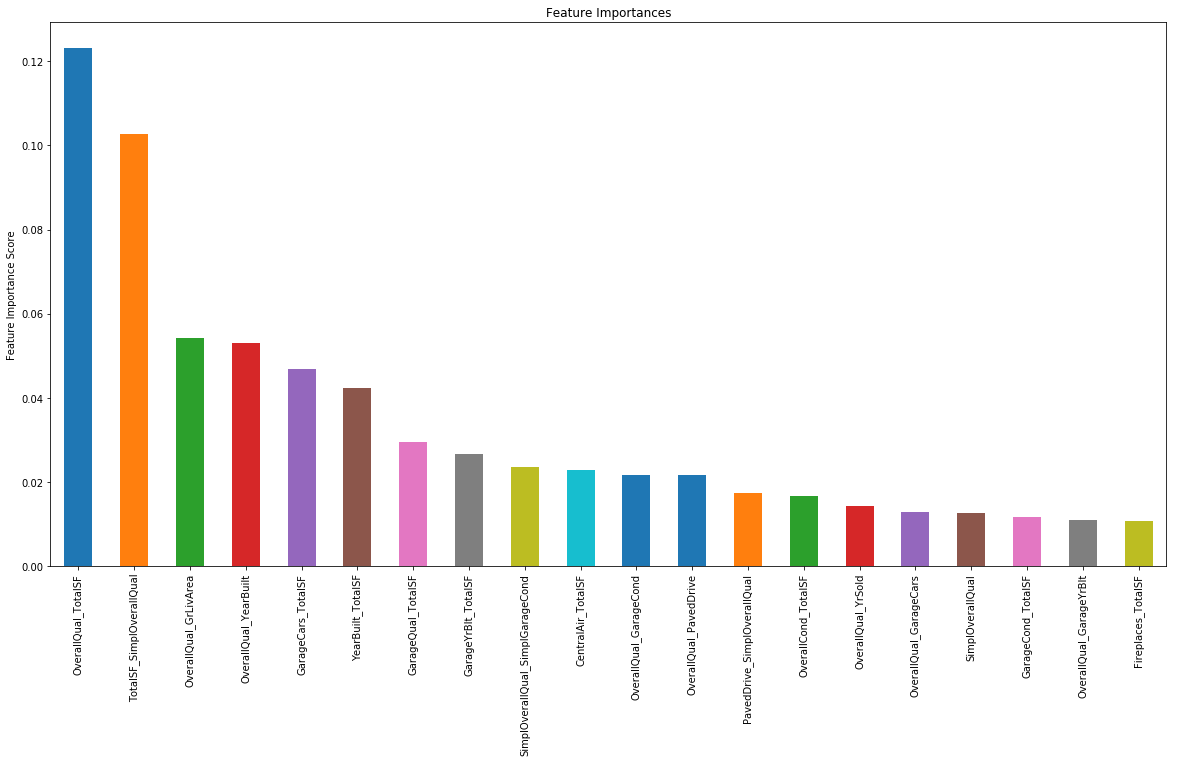

In [187]:
# LR reduced to 0.025 and n_estimators increased to 640
gbm_tuned_3 = GradientBoostingRegressor(learning_rate=0.025,
                                        n_estimators=640,
                                        max_depth=4,
                                        min_samples_split=320,
                                        min_samples_leaf=4,
                                        max_features=220,
                                        subsample=0.8,
                                        random_state=10)
modelfit(gbm_tuned_3, predictors=predictors)

## Submission


Model Report
R2 Score : 0.9658
RMSE Score (Train): 0.147862
CV Score : Mean = 0.1188172 | Std = 0.005395378 | Min = 0.1104476 | Max = 0.1255028


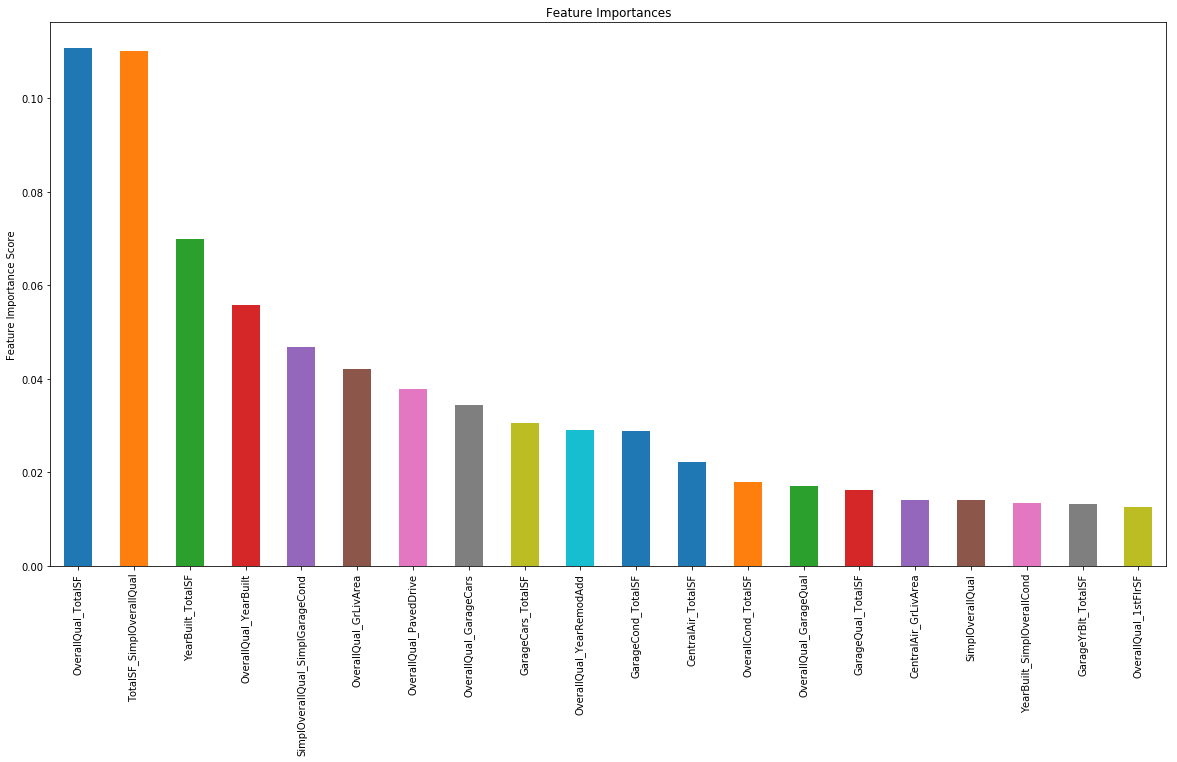

In [174]:
modelfit(gbm_tuned_2, X_test=X_test, predictors=predictors)

## Submission

In [178]:
test_label = gbm_tuned_2.predict(X_test)

In [180]:
test_label

array([11.71131964, 11.98723942, 12.11653719, ..., 12.01931309,
       11.68096576, 12.31533516])

In [10]:
from submission import submit

In [ ]:
submit(test_label, df_test)